In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("/tmp/books_new.csv", index_col='Title')

In [4]:
df.head()

,Author,Genre,SubGenre,Height,Publisher
Title,,,,,
Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley
Data Smart,"Foreman, John",tech,data_science,235,Wiley
God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin
Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins
Orientalism,"Said, Edward",nonfiction,history,197,Penguin


In [5]:
df['Author'] = df['Author'].astype(str).apply(lambda x: x.split(',')[0].lower())

In [6]:
df.head()

,Author,Genre,SubGenre,Height,Publisher
Title,,,,,
Fundamentals of Wavelets,goswami,tech,signal_processing,228,Wiley
Data Smart,foreman,tech,data_science,235,Wiley
God Created the Integers,hawking,tech,mathematics,197,Penguin
Superfreakonomics,dubner,science,economics,179,HarperCollins
Orientalism,said,nonfiction,history,197,Penguin


In [7]:
df.Author.nunique()

126

In [8]:
df.Genre.nunique()

5

In [9]:
df.SubGenre.nunique()

22

In [10]:
X = np.c_[pd.get_dummies(df.Author).values, pd.get_dummies(df.Genre).values,
          pd.get_dummies(df.SubGenre).values, df.Height.values.astype(float)]

In [11]:
X.shape

(211, 154)

In [12]:
126 + 5 + 22

153

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=2)

In [15]:
x_red = pca.fit_transform(X)

In [16]:
from scipy.spatial import ConvexHull

In [17]:
hull = ConvexHull(x_red)

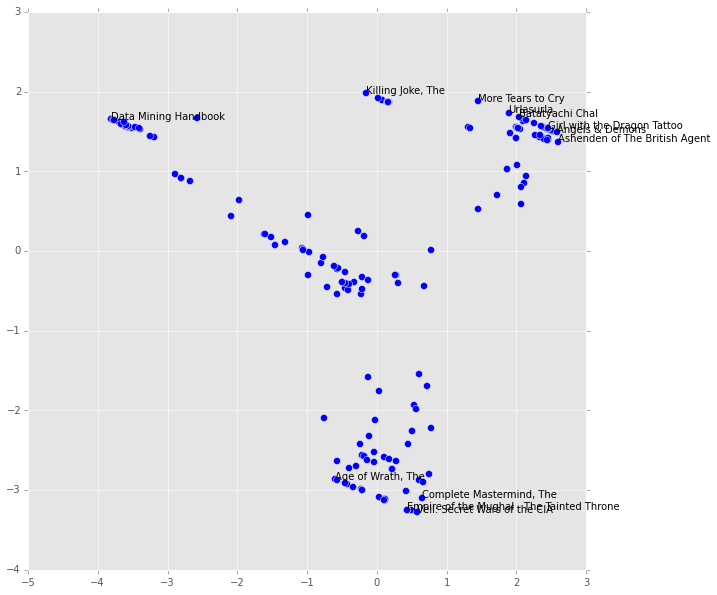

In [18]:
plt.figure(figsize=(10, 10))
plt.scatter(x_red[:, 0], x_red[:, 1], s=50)
for vertex in hull.vertices:
    plt.annotate(df.index[vertex], xy=x_red[vertex, :])

In [19]:
km = KMeans(n_clusters=6, n_jobs=-1)
clusters = km.fit_predict(x_red)

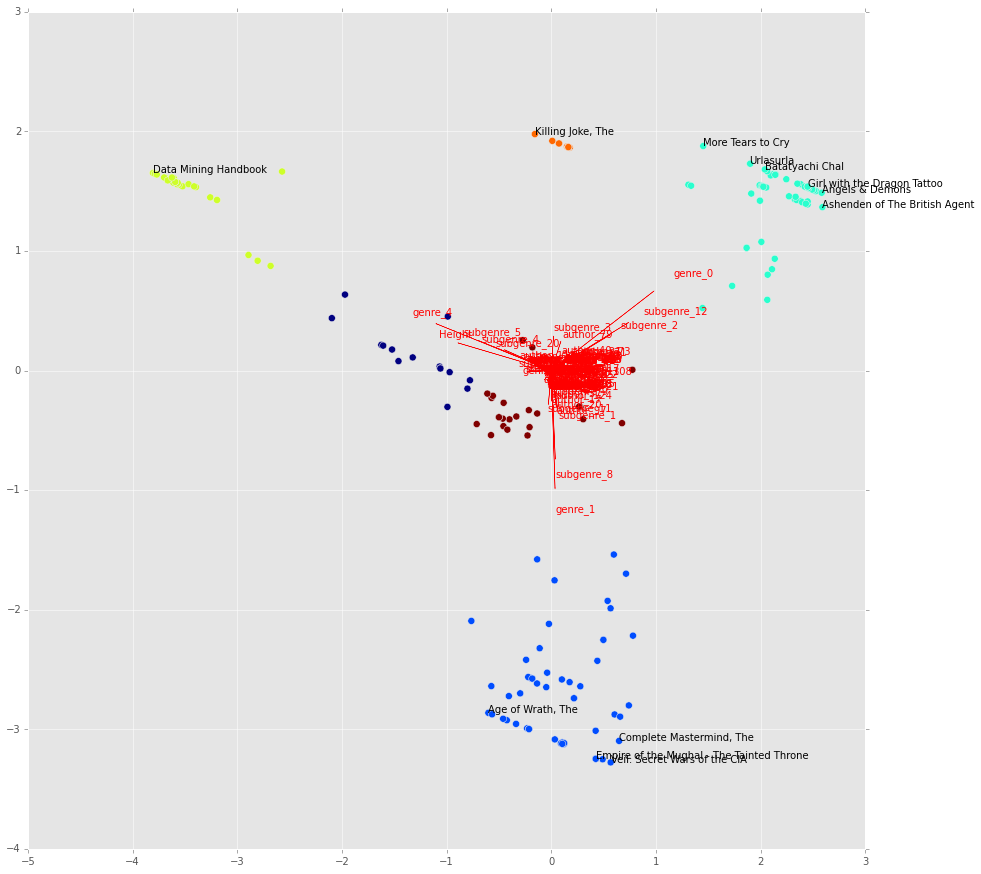

In [20]:
#0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(X)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(X)[:,1]



columns = ['author_{}'.format(i) for i in range(df.Author.nunique())] + \
          ['genre_{}'.format(i) for i in range(df.Genre.nunique())] + \
          ['subgenre_{}'.format(i) for i in range(df.SubGenre.nunique())] + ['Height']
## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

plt.figure(figsize=(15, 15))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(columns)[i], color='r')

#for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
#    plt.plot(xs[i], ys[i], 'bo')
#    plt.text(xs[i]*1.2, ys[i]*1.2, list(df.index)[i], color='b')
plt.scatter(xs, ys, c=clusters, s=50)

for vertex in hull.vertices:
    plt.annotate(df.index[vertex], xy=x_red[vertex, :])

#plt.show()

In [21]:
df['cluster'] = clusters

In [22]:
df.cluster.value_counts()

2    64
1    60
3    35
5    24
0    15
4    13
dtype: int64

In [28]:
df[df.cluster == 5]

,Author,Genre,SubGenre,Height,Publisher,cluster
Title,,,,,,
Superfreakonomics,dubner,science,economics,179,HarperCollins,5
Physics & Philosophy,heisenberg,philosophy,science,197,Penguin,5
"Wealth of Nations, The",smith,science,economics,175,Random House,5
"Tao of Physics, The",capra,science,physics,179,Penguin,5
Surely You're Joking Mr Feynman,feynman,science,physics,198,Random House,5
Return of the Primitive,rand,philosophy,objectivism,202,Penguin,5
"Hidden Connections, The",capra,science,physics,197,HarperCollins,5
"Idea of Justice, The",sen,philosophy,economics,212,Penguin,5
Beyond Degrees,nan,philosophy,education,222,HarperCollins,5


In [ ]:
{}